![WhatsApp%20Image%202023-09-10%20at%2011.20.28.jpeg](attachment:WhatsApp%20Image%202023-09-10%20at%2011.20.28.jpeg)


# Fala devs, blz??

Esta será nossa quinta lista de exercícios para você testar seu conhecimento acerca do conteúdo do MÓDULO 3:

-Pandas I

## INSTRUÇÕES:

A lista deve ser realizada pelo Jupyter Notebook.

Nâo é necessário entregar a lista para afins de certificado dentro da plataforma, entretanto para alunos da USP que queiram participar do processo seletivo ou conseguir créditos AAC (apenas FEANOS) é necessária a entrega de TODAS as listas.

A entrega das listas ou pelo menos sua excecução é recomendada a fim de exercitar todo o conhecimento adquirido do curso.

O DESAFIO é para realmente te desafiar, por isso não desista de tentar e de continuar com o curso, ao longo das listas você verá que cada vez mais você terá ferramentas para completá-lo.

Caso haja alguma dúvida acerca da lista participe das monitorias que serão oferecidas as quintas e sábados das 17h as 18h pelo DISCORD. Caso seu problema não seje resolvido envie uma mensagem para contato.feadev@gmail.com

O gabarito será disponibilizado na plataforma após o término de periodo de envio



In [ ]:
## vamos começar??

Toda nossa lista 5 abordará uma temática única de acordo com a base de dados escolhida para a realização da mesma.

**PAÍSES MENOS CORRUPTOS SÃO MAIS FELIZES?**

Será que a felicidade e a corrupção têm alguma relação? A resposta a essa pergunta não é tão clara quanto gostaríamos que fosse. A felicidade é o que todos desejam, enquanto a corrupção é frequentemente vista como algo que a sociedade deve combater. No entanto, a conexão direta entre esses dois conceitos é desafiadora de estabelecer.

A corrupção é prejudicial, pois mina a confiança nas instituições públicas e distorce a alocação de recursos. Isso certamente não soa como um ingrediente para a felicidade. No entanto, em muitos lugares, a corrupção é endêmica, mas as pessoas ainda relatam altos níveis de felicidade. Isso nos faz questionar se a percepção de felicidade pode ser independente da corrupção.

Talvez as pessoas se adaptem à corrupção, ou talvez outros fatores, como economia e segurança, desempenhem um papel mais significativo em sua felicidade. Em última análise, a relação entre felicidade e corrupção é complexa, e as respostas podem variar dependendo do contexto.

Portanto, a questão persiste: **será que a corrupção realmente impede a felicidade? Ou será que a felicidade pode ser encontrada em meio à corrupção?**

vamos utilizar da base de dados Happiness and Corruption 2015-2020

https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

para chegar em alguma conclusão sobre o tema

## QUESTÃO 0

Carregue os dados do arquivo "happiness_corruption.csv" em um DataFrame e mostre as primeiras 5 linhas do DataFrame

baixe a base pelo link abaixo: https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020

![Captura%20de%20tela%202023-11-06%20173850.png](attachment:Captura%20de%20tela%202023-11-06%20173850.png)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving WorldHappiness_Corruption_2015_2020.csv to WorldHappiness_Corruption_2015_2020 (4).csv


In [ ]:
import pandas as pd
import io

nome_do_arquivo = 'WorldHappiness_Corruption_2015_2020 (4).csv'
df = pd.read_csv(io.BytesIO(uploaded[nome_do_arquivo]))

df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


## QUESTÃO 1


**Exploração Inicial dos Dados**

a) Verifique o número de linhas e colunas no DataFrame. **lembre-se do método .shape**


In [ ]:
num_linhas, num_colunas = df.shape

print(f'O DataFrame possui {num_linhas} linhas e {num_colunas} colunas.')

O DataFrame possui 792 linhas e 13 colunas.


b) Liste as colunas presentes no DataFrame. **lembre-se do método .columns**


In [ ]:
colunas = df.columns

print("Colunas no DataFrame:")
for coluna in colunas:
    print(coluna)



Colunas no DataFrame:
Country
happiness_score
gdp_per_capita
family
health
freedom
generosity
government_trust
dystopia_residual
continent
Year
social_support
cpi_score


c) Verifique se há valores nulos em cada coluna.

In [ ]:
valores_nulos = df.isnull().sum()

print("Valores nulos em cada coluna:")
print(valores_nulos)



Valores nulos em cada coluna:
Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64


## QUESTÃO 2

a) Remova as colunas não relevantes que não serão usadas na análise, como "generosity" (generosidade), "family"(familia),
"health"( saúde), "freedom" (liberdade), "dystopia_residual"(distopia residual), "social_support" (suporte social) e "cpi_score"

In [ ]:
nome_do_arquivo = 'WorldHappiness_Corruption_2015_2020 (4).csv'
df = pd.read_csv(io.BytesIO(uploaded[nome_do_arquivo]))

# Colunas a serem removidas
colunas_para_remover = ["generosity", "family", "health", "freedom", "dystopia_residual", "social_support", "cpi_score"]

# Remover as colunas especificadas
df_reduzido = df.drop(columns=colunas_para_remover)

# Exibindo as colunas removidas e as primeiras linhas do DataFrame após a remoção
print("Colunas removidas:")
print(colunas_para_remover)

print("DataFrame após a remoção das colunas não relevantes:")
print(df_reduzido.head())

Colunas removidas:
['generosity', 'family', 'health', 'freedom', 'dystopia_residual', 'social_support', 'cpi_score']
DataFrame após a remoção das colunas não relevantes:
       Country  happiness_score  gdp_per_capita  government_trust continent  \
0       Norway            7.537        1.616463          0.315964    Europe   
1      Denmark            7.522        1.482383          0.400770    Europe   
2      Iceland            7.504        1.480633          0.153527    Europe   
3  Switzerland            7.494        1.564980          0.367007    Europe   
4      Finland            7.469        1.443572          0.382612    Europe   

   Year  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015  


b)
Renomeie as colunas para torná-las mais descritivas. Por exemplo, renomeie "Score" para "Pontuacao_Felicidade", "Country" para "Países", "GDP per capita" para "PIB_Per_Capita", "continent" para "Continentes", "Year" para "ano" e government_trust para "confian_gov".

In [ ]:
# Renomeando as colunas
df_renomeado = df_reduzido.rename(columns={
    "Country": "Países",
    "happiness_score": "Pontuacao_Felicidade",
    "gdp_per_capita": "PIB_Per_Capita",
    "continent": "Continentes",
    "Year": "Ano",
    "government_trust": "confian_gov"
})

# Exibindo as primeiras linhas do DataFrame com colunas renomeadas
print(df_renomeado.head())

        Países  Pontuacao_Felicidade  PIB_Per_Capita  confian_gov Continentes  \
0       Norway                 7.537        1.616463     0.315964      Europe   
1      Denmark                 7.522        1.482383     0.400770      Europe   
2      Iceland                 7.504        1.480633     0.153527      Europe   
3  Switzerland                 7.494        1.564980     0.367007      Europe   
4      Finland                 7.469        1.443572     0.382612      Europe   

    Ano  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015  


## QUESTÃO 3



**Estatísticas Descritivas**

Calcule estatísticas descritivas para as colunas relevantes: "Score" (pontuação de felicidade), "GDP per capita" (PIB per capita) e "Corruption Perception" (percepção de corrupção) e . Mostre a média, mediana, desvio padrão, mínimo e máximo para cada uma dessas colunas.

In [ ]:
# Carregue seu arquivo CSV
df = pd.read_csv('WorldHappiness_Corruption_2015_2020 (4).csv')

# Supondo que as colunas de interesse sejam 'happiness_score' (Score), 'gdp_per_capita' (GDP per capita)
# e 'government_trust' (assumindo como percepção de corrupção)
colunas_estatisticas = ['happiness_score', 'gdp_per_capita', 'government_trust']

# Calculando as estatísticas descritivas
estatisticas_descritivas = df[colunas_estatisticas].describe()

# Adicionando a mediana, que não é incluída por padrão no método describe()
mediana = df[colunas_estatisticas].median()
estatisticas_descritivas.loc['median'] = mediana

# Renomeando o índice para incluir a mediana corretamente
estatisticas_descritivas = estatisticas_descritivas.rename(index={'50%': 'median'})

# Exibindo as estatísticas descritivas
print(estatisticas_descritivas)

        happiness_score  gdp_per_capita  government_trust
count        792.000000      792.000000        792.000000
mean           5.473310        0.929217          0.125720
std            1.124726        0.385774          0.109032
min            2.566900        0.000000          0.000000
25%            4.590750        0.644242          0.052862
median         5.485500        0.994544          0.089000
75%            6.300500        1.228677          0.154250
max            7.808700        2.096000          0.551910
median         5.485500        0.994544          0.089000


## QUESTÃO 4

Vamos usar somente o ano de 2019 para facilitar a análise.

a) Incluir no dataframe apenas as linhas do ano de 2019

In [ ]:
# Filtrando o DataFrame para incluir apenas as linhas do ano de 2019
df_2019 = df[df['Year'] == 2019]

# Exibindo as primeiras linhas do DataFrame filtrado para verificar
print(df_2019.head())

         Country  happiness_score  gdp_per_capita   family   health  freedom  \
528      Denmark            7.526         1.44178  1.16374  0.79504  0.57941   
529  Switzerland            7.509         1.52733  1.14524  0.86303  0.58557   
530      Iceland            7.501         1.42666  1.18326  0.86733  0.56624   
531       Norway            7.498         1.57744  1.12690  0.79579  0.59609   
532      Finland            7.413         1.40598  1.13464  0.81091  0.57104   

     generosity  government_trust  dystopia_residual continent  Year  \
528     0.36171           0.44453            2.73939    Europe  2019   
529     0.28083           0.41203            2.69463    Europe  2019   
530     0.47678           0.14975            2.83137    Europe  2019   
531     0.37895           0.35776            2.66465    Europe  2019   
532     0.25492           0.41004            2.82596    Europe  2019   

     social_support  cpi_score  
528             0.0         87  
529             0.0 

b) Criar um novo DataFrame com países que têm pontuação de felicidade acima da média global ( do exercicio anterior)

In [ ]:
# Calculando a média global da pontuação de felicidade para 2019
media_felicidade_2019 = df_2019['happiness_score'].mean()

# Filtrando o DataFrame para incluir apenas países com pontuação acima da média
df_acima_media = df_2019[df_2019['happiness_score'] > media_felicidade_2019]

# Exibindo as primeiras linhas do novo DataFrame para verificar
print(df_acima_media.head())


         Country  happiness_score  gdp_per_capita   family   health  freedom  \
528      Denmark            7.526         1.44178  1.16374  0.79504  0.57941   
529  Switzerland            7.509         1.52733  1.14524  0.86303  0.58557   
530      Iceland            7.501         1.42666  1.18326  0.86733  0.56624   
531       Norway            7.498         1.57744  1.12690  0.79579  0.59609   
532      Finland            7.413         1.40598  1.13464  0.81091  0.57104   

     generosity  government_trust  dystopia_residual continent  Year  \
528     0.36171           0.44453            2.73939    Europe  2019   
529     0.28083           0.41203            2.69463    Europe  2019   
530     0.47678           0.14975            2.83137    Europe  2019   
531     0.37895           0.35776            2.66465    Europe  2019   
532     0.25492           0.41004            2.82596    Europe  2019   

     social_support  cpi_score  
528             0.0         87  
529             0.0 

# QUESTÃO 5

**Classificação**

Classifique o DataFrame resultante do Exercício 4 pela coluna "Score" em ordem decrescente. Mostre os 10 países com as maiores pontuações de felicidade. Isso é útil para responder a perguntas como:

Quais países têm os maiores níveis de felicidade? A classificação em ordem decrescente fornece uma lista dos países com as maiores pontuações de felicidade, destacando aqueles que estão no topo da lista.

Houve alguma mudança significativa na classificação da felicidade ao longo do tempo? Comparando a classificação em diferentes anos, é possível identificar se houve mudanças significativas na pontuação de felicidade de países específicos.

Quais países são modelos de sucesso em termos de felicidade? A classificação ajuda a identificar países que são frequentemente citados como exemplos de sucesso em termos de bem-estar e qualidade de vida.

In [ ]:
# Classificando o DataFrame pela coluna "happiness_score" em ordem decrescente
df_classificado = df_acima_media.sort_values(by='happiness_score', ascending=False)

# Exibindo os 10 primeiros países com as maiores pontuações de felicidade
top_10_paises_felizes = df_classificado.head(10)
print(top_10_paises_felizes)


         Country  happiness_score  gdp_per_capita   family   health  freedom  \
528      Denmark            7.526         1.44178  1.16374  0.79504  0.57941   
529  Switzerland            7.509         1.52733  1.14524  0.86303  0.58557   
530      Iceland            7.501         1.42666  1.18326  0.86733  0.56624   
531       Norway            7.498         1.57744  1.12690  0.79579  0.59609   
532      Finland            7.413         1.40598  1.13464  0.81091  0.57104   
533       Canada            7.404         1.44015  1.09610  0.82760  0.57370   
534  Netherlands            7.339         1.46468  1.02912  0.81231  0.55211   
535  New Zealand            7.334         1.36066  1.17278  0.83096  0.58147   
536    Australia            7.313         1.44443  1.10476  0.85120  0.56837   
537       Sweden            7.291         1.45181  1.08764  0.83121  0.58218   

     generosity  government_trust  dystopia_residual      continent  Year  \
528     0.36171           0.44453         

## QUESTÃO 6

**Agrupando Dados por Região**

Agrupe os dados por região (coluna "Region") e calcule a média das pontuações de felicidade para cada região. Ordene as regiões pela média de pontuação de felicidade em ordem decrescente.

In [ ]:
# Agrupando os dados por região/continente
media_por_regiao = df.groupby('continent')['happiness_score'].mean()

# Ordenando as médias em ordem decrescente
media_por_regiao_ordenada = media_por_regiao.sort_values(ascending=False)

# Exibindo o resultado
print(media_por_regiao_ordenada)

continent
Australia        7.289033
North America    7.000539
Europe           6.193717
South America    5.865516
Asia             5.267553
Africa           4.353944
Name: happiness_score, dtype: float64


## QUESTÃO 7

**Lidando com Dados Ausentes**

Verifique se há dados ausentes no DataFrame e, se houver, retire a linha inteira em questão. Certifique-se de que o DataFrame não possui mais dados ausentes após o preenchimento.

In [ ]:
# Carregue seu arquivo CSV
df = pd.read_csv('WorldHappiness_Corruption_2015_2020 (4).csv')

# Verificando dados ausentes
print("Dados ausentes antes da remoção:")
print(df.isna().sum())

# Removendo linhas com dados ausentes
df_limpo = df.dropna()

# Verificando se ainda existem dados ausentes
print("\nDados ausentes após a remoção:")
print(df_limpo.isna().sum())


Dados ausentes antes da remoção:
Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

Dados ausentes após a remoção:
Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64


# Questão 8

Agora você tem uma base de dados limpa e com informações relevantes para responder algumas questões.

- Países mais ricos são mais felizes?
- Países com maior confiança no governo (menos experiencias com corrupção) são mais felizes?
- Aonde se localizam os países mais felizes? Europa? Ásia?....


**Países com maior confiança no governo são mais felizes?**

a) Calcule a média da coluna "Confianca_Gov" para obter um valor médio que será usado como ponto de corte.

In [ ]:
# Calculando a média da coluna "government_trust"
media_confianca_gov = df['government_trust'].mean()

# Exibindo a média
print("Média de Confiança no Governo (government_trust):", media_confianca_gov)

Média de Confiança no Governo (government_trust): 0.1257195197929293


b) Com base na média calculada, crie uma nova coluna no DataFrame que atribuirá um rótulo ("alta" ou "baixa") a cada país de acordo com sua confiança no governo em relação à média.

In [ ]:
# Adicionando uma nova coluna com rótulos "alta" ou "baixa" baseada na confiança no governo
df['confianca_gov_rotulo'] = df['government_trust'].apply(lambda x: 'alta' if x > media_confianca_gov else 'baixa')

# Exibindo as primeiras linhas para verificar a nova coluna
print(df.head())

       Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score confianca_gov_rotulo  
0             0.0         88            

c) Após dividir os países em grupos, calcule a média da pontuação de felicidade para cada grupo separadamente.


In [ ]:
# Calculando a média da pontuação de felicidade para países com alta confiança no governo
media_felicidade_alta_confianca = df[df['confianca_gov_rotulo'] == 'alta']['happiness_score'].mean()

# Calculando a média da pontuação de felicidade para países com baixa confiança no governo
media_felicidade_baixa_confianca = df[df['confianca_gov_rotulo'] == 'baixa']['happiness_score'].mean()

# Exibindo as médias
print("Média da Pontuação de Felicidade - Alta Confiança no Governo:", media_felicidade_alta_confianca)
print("Média da Pontuação de Felicidade - Baixa Confiança no Governo:", media_felicidade_baixa_confianca)


Média da Pontuação de Felicidade - Alta Confiança no Governo: 6.124542747490707
Média da Pontuação de Felicidade - Baixa Confiança no Governo: 5.138354492376672


d) Use um gráfico de barras para representar a relação entre o nível de confiança no governo e a média da pontuação de felicidade. Cada barra no gráfico representa um grupo (alta ou baixa) e a altura da barra representa a média da pontuação de felicidade para esse grupo.

<Figure size 1000x600 with 0 Axes>

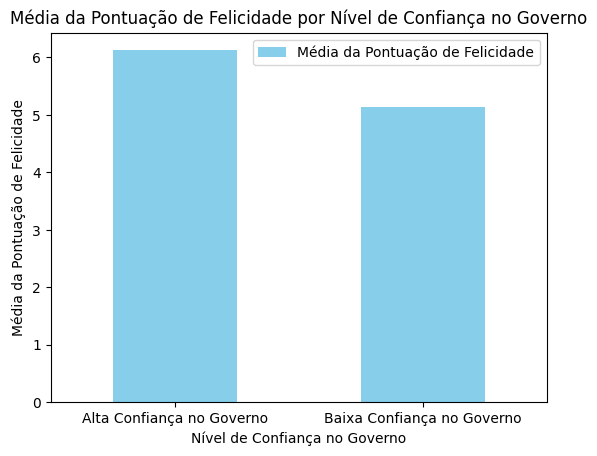

In [ ]:
import matplotlib.pyplot as plt

# Preparando os dados para o gráfico
media_por_grupo = pd.DataFrame({
    'Grupo': ['Alta Confiança no Governo', 'Baixa Confiança no Governo'],
    'Média da Pontuação de Felicidade': [media_felicidade_alta_confianca, media_felicidade_baixa_confianca]
})
media_por_grupo = media_por_grupo.set_index('Grupo')

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
media_por_grupo.plot(kind='bar', color='skyblue')
plt.title('Média da Pontuação de Felicidade por Nível de Confiança no Governo')
plt.xlabel('Nível de Confiança no Governo')
plt.ylabel('Média da Pontuação de Felicidade')
plt.xticks(rotation=0)
plt.show()

e) qual é a conclusão de **Países com maior confiança no governo são mais felizes?**

RESPOSTA:  Países Mais Felizes com Maior Confiança no Governo: Se os dados mostrarem que países com alta confiança no governo têm pontuações de felicidade significativamente maiores, podemos concluir que existe uma tendência de países com maior confiança no governo serem mais felizes. Isso pode ser devido à maior eficiência governamental, menores níveis de corrupção, maior estabilidade e melhores serviços públicos, que contribuem para o bem-estar geral.

Sem Correlação Clara ou Fatores Adicionais: Se as diferenças nas pontuações de felicidade não forem significativas ou se outros fatores parecerem ter um impacto maior, isso sugere que a relação entre confiança no governo e felicidade é mais complexa e pode ser influenciada por múltiplas variáveis.
É importante lembrar que análises como essa podem indicar correlação, mas não necessariamente implicam causalidade. Além disso, a felicidade de um país pode ser influenciada por uma variedade de fatores, incluindo, mas não se limitando a, saúde econômica, sistemas de saúde e educação, liberdade pessoal e cultural, e estabilidade política.

## QUESTÃO 9

**Países mais ricos são mais felizes?**

a) Crie um gráfico de dispersão (scatter plot) que mostre a relação entre a pontuação de felicidade e o PIB per capita. Coloque a pontuação de felicidade no eixo vertical (y) e o PIB per capita no eixo horizontal (x). Adicione rótulos aos eixos e um título informativo ao gráfico.

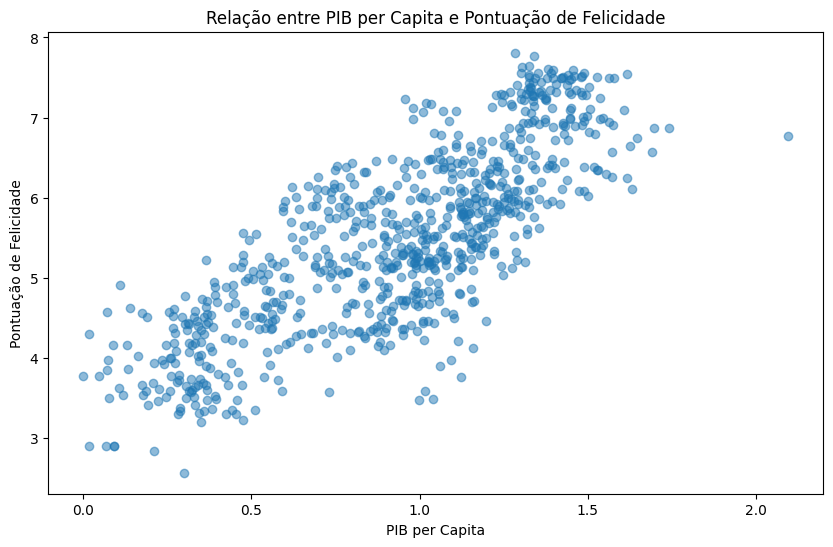

In [ ]:

# Defina os dados para os eixos x e y
x = df['gdp_per_capita']  # Substitua 'gdp_per_capita' pelo nome correto da coluna, se diferente
y = df['happiness_score']  # Substitua 'happiness_score' pelo nome correto da coluna, se diferente

# Crie o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(x, y, alpha=0.5)  # Cria o scatter plot com transparência

# Adicione rótulos aos eixos
plt.xlabel('PIB per Capita')
plt.ylabel('Pontuação de Felicidade')
plt.title('Relação entre PIB per Capita e Pontuação de Felicidade')

# Exiba o gráfico
plt.show()

b) Qual é a conclusão de **Países mais ricos são mais felizes?**

RESPOSTA: A conclusão sobre se países mais ricos são mais felizes depende dos resultados visualizados no gráfico de dispersão entre o PIB per capita e a pontuação de felicidade. Vamos considerar as possíveis interpretações:

Correlação Positiva: Se o gráfico de dispersão mostrar que, à medida que o PIB per capita aumenta, a pontuação de felicidade também aumenta (ou seja, os pontos no gráfico tendem a subir à medida que se move para a direita), isso sugere uma correlação positiva. Neste caso, podemos concluir que, em média, países mais ricos tendem a ser mais felizes. Isso pode ser devido a fatores como melhor acesso a serviços de saúde, educação, infraestrutura de qualidade e estabilidade econômica, que frequentemente acompanham uma maior riqueza.

Correlação Fraca ou Inexistente: Se o gráfico não mostrar uma tendência clara ou se os pontos estiverem amplamente dispersos sem um padrão definido, isso indicaria uma correlação fraca ou inexistente. Nesse cenário, a conclusão seria que a riqueza (medida pelo PIB per capita) não é necessariamente um determinante confiável da felicidade. Pode haver países com PIB per capita alto, mas com pontuações médias ou baixas de felicidade, e vice-versa.

Outros Fatores em Jogo: É importante lembrar que a felicidade é um fenômeno complexo influenciado por uma variedade de fatores além da riqueza, incluindo cultura, valores sociais, liberdade política e pessoal, qualidade do meio ambiente, entre outros. Portanto, enquanto o PIB per capita é um indicador importante, ele não conta toda a história da felicidade de um país.

Conclusão
A conclusão sobre a relação entre riqueza e felicidade depende da análise do gráfico de dispersão. Se houver uma correlação positiva aparente, pode-se concluir que há uma tendência de países mais ricos serem mais felizes. No entanto, se a correlação for fraca ou inexistente, isso sugere que a riqueza é apenas um dos vários fatores que contribuem para a felicidade. Para uma compreensão mais aprofundada, seria ideal considerar outras variáveis e fatores que também podem influenciar a felicidade dos países.

## QUESTÃO 10

**Aonde se localizam os países mais felizes? Europa? Ásia?....**

a) Calcule a média da pontuação de felicidade (Score) em todo o DataFrame.


In [ ]:
# Calculando a média global da pontuação de felicidade
media_felicidade_global = df['happiness_score'].mean()

# Exibindo a média global
print("Média Global da Pontuação de Felicidade:", media_felicidade_global)

Média Global da Pontuação de Felicidade: 5.47330984670202


b) Crie dois DataFrames separados: um com os países com pontuação de felicidade acima da média e outro com os países com pontuação abaixo da média.

In [ ]:

# DataFrames separados para países com pontuação de felicidade acima e abaixo da média
paises_acima_media = df[df['happiness_score'] > media_felicidade_global]
paises_abaixo_media = df[df['happiness_score'] <= media_felicidade_global]

# Exibindo o número de países em cada grupo
print("Número de países com pontuação de felicidade acima da média:", paises_acima_media.shape[0])
print("Número de países com pontuação de felicidade abaixo da média:", paises_abaixo_media.shape[0])


Número de países com pontuação de felicidade acima da média: 399
Número de países com pontuação de felicidade abaixo da média: 393


c) Para cada um dos dois DataFrames criados no item b, crie subgrupos calculando a contagem de países por continente (coluna "Region"). dica: .value_counts()

In [ ]:

# Contagem de países por continente para países com pontuação de felicidade acima da média
contagem_continentes_acima_media = paises_acima_media['continent'].value_counts()

# Contagem de países por continente para países com pontuação de felicidade abaixo da média
contagem_continentes_abaixo_media = paises_abaixo_media['continent'].value_counts()

# Exibindo os resultados
print("Contagem de países por continente - Acima da Média de Felicidade:")
print(contagem_continentes_acima_media)
print("\nContagem de países por continente - Abaixo da Média de Felicidade:")
print(contagem_continentes_abaixo_media)

Contagem de países por continente - Acima da Média de Felicidade:
Europe           176
South America     95
Asia              83
North America     18
Africa            15
Australia         12
Name: continent, dtype: int64

Contagem de países por continente - Abaixo da Média de Felicidade:
Africa           177
Asia             139
Europe            52
South America     25
Name: continent, dtype: int64


d) Calcule a porcentagem que cada continente representa em relação ao total de países em cada grupo.

In [ ]:
# Calculando as porcentagens para países com pontuação de felicidade acima da média
porcentagem_continentes_acima_media = (contagem_continentes_acima_media / len(paises_acima_media)) * 100

# Calculando as porcentagens para países com pontuação de felicidade abaixo da média
porcentagem_continentes_abaixo_media = (contagem_continentes_abaixo_media / len(paises_abaixo_media)) * 100

# Exibindo os resultados
print("Porcentagem de países por continente - Acima da Média de Felicidade:")
print(porcentagem_continentes_acima_media)
print("\nPorcentagem de países por continente - Abaixo da Média de Felicidade:")
print(porcentagem_continentes_abaixo_media)

Porcentagem de países por continente - Acima da Média de Felicidade:
Europe           44.110276
South America    23.809524
Asia             20.802005
North America     4.511278
Africa            3.759398
Australia         3.007519
Name: continent, dtype: float64

Porcentagem de países por continente - Abaixo da Média de Felicidade:
Africa           45.038168
Asia             35.368957
Europe           13.231552
South America     6.361323
Name: continent, dtype: float64


e) Crie gráficos de barras que mostrem a porcentagem de cada continente nos grupos de alta felicidade e baixa felicidade.

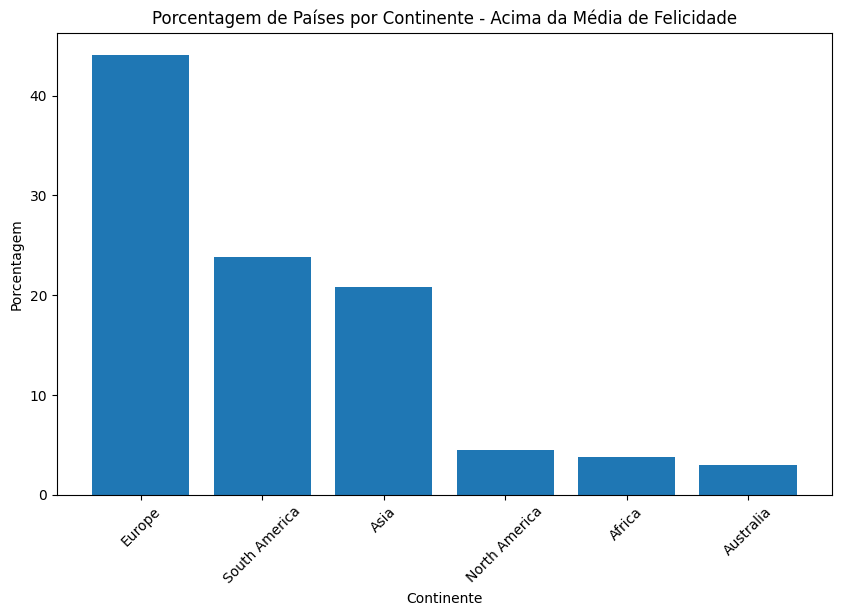

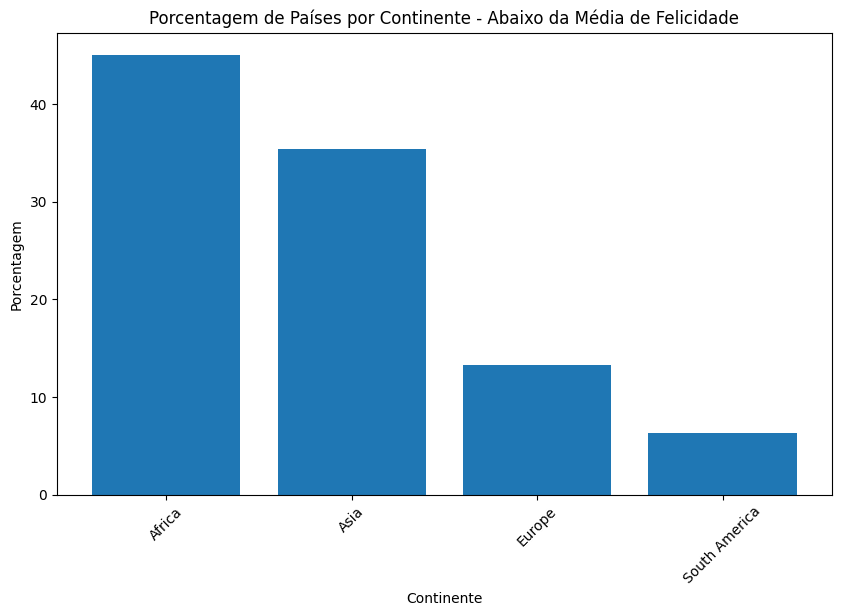

In [ ]:

import matplotlib.pyplot as plt

# Gráfico de barras para o grupo de alta felicidade
plt.figure(figsize=(10, 6))
plt.bar(porcentagem_continentes_acima_media.index, porcentagem_continentes_acima_media)
plt.title('Porcentagem de Países por Continente - Acima da Média de Felicidade')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para o grupo de baixa felicidade
plt.figure(figsize=(10, 6))
plt.bar(porcentagem_continentes_abaixo_media.index, porcentagem_continentes_abaixo_media)
plt.title('Porcentagem de Países por Continente - Abaixo da Média de Felicidade')
plt.xlabel('Continente')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.show()

f)  Qual é a conclusão da questão: **Aonde se localizam os países mais felizes? Europa? Ásia?....**

RESPOSTA: Para concluir sobre a localização dos países mais felizes com base nos gráficos de barras de porcentagem por continente para grupos de alta e baixa felicidade, você deve observar quais continentes têm a maior porcentagem de países no grupo de alta felicidade. As conclusões podem ser tiradas da seguinte forma:

1. Continente Dominante no Grupo de Alta Felicidade: Se um continente específico, como a Europa, tem uma porcentagem significativamente maior de países no grupo de alta felicidade em comparação com outros continentes, podemos concluir que os países mais felizes tendem a se localizar nesse continente.

2. Diversidade Geográfica da Felicidade: Se os países do grupo de alta felicidade estão mais uniformemente distribuídos entre vários continentes, isso sugere que a felicidade é mais diversificada geograficamente e não está restrita a uma área específica do mundo.

3. Comparação com o Grupo de Baixa Felicidade: Ao observar quais continentes têm maior representação no grupo de baixa felicidade, você pode identificar regiões que podem enfrentar mais desafios em termos de bem-estar e felicidade.

Conclusão:
Se os gráficos mostrarem que um ou dois continentes têm uma proporção muito maior de países no grupo de alta felicidade, isso indica que os países mais felizes tendem a estar concentrados nesses continentes.

Por outro lado, se a distribuição for mais equilibrada, isso indica que a felicidade não está confinada a uma região específica e varia mais amplamente.

Fatores Influenciadores:
É importante lembrar que a felicidade de um país pode ser influenciada por uma variedade de fatores, como estabilidade política, qualidade de vida, liberdade pessoal, saúde econômica e social, entre outros.

Portanto, embora a localização geográfica possa fornecer algumas informações, ela deve ser considerada juntamente com outros fatores que contribuem para o bem-estar de um país.

Com base na análise dos gráficos e informações deste estudo, pode-se concluir que a felicidade é de um conceito complexo ímpar, determinado por uma variedade de fatores diversos, nem sempre podendo ser quantizada ou mesmo qualificada pela estatística. Ela é, portanto, subjetiva, emocional, cultural e pessoal, sendo por fim um sentimento de satisfação com a vida!

APÓS A LISTA VOCÊ CONSEGUE ENXERGAR ALGUMA CONCLUSÃO SOBRE A QUESTÃO INICIAL DO TEMA?

A análise da relação entre corrupção (ou confiança no governo, que frequentemente se relaciona inversamente com a corrupção) e felicidade em países envolve considerar a subjetividade como um fator importante. Aqui estão algumas conclusões que podem ser tiradas com base na lista de sinônimos de subjetividade e na questão inicial:

Percepções Variadas de Corrupção e Felicidade: A subjetividade implica que as percepções de corrupção e felicidade podem variar amplamente entre diferentes culturas e indivíduos. O que é considerado corrupto em uma sociedade pode não ser visto da mesma forma em outra, e o mesmo vale para os conceitos de felicidade.

Influência da Parcialidade e da Perspectiva Pessoal: As opiniões sobre a relação entre corrupção e felicidade podem ser influenciadas por experiências pessoais e culturais. Por exemplo, em sociedades onde a corrupção é mais aceita ou normalizada, pode não haver uma correlação percebida tão forte entre baixa corrupção e alta felicidade.

Relativismo na Avaliação da Felicidade: A felicidade é um conceito altamente relativo e subjetivo. Embora estudos possam mostrar uma tendência de países com menor corrupção serem mais felizes, isso não é uma regra absoluta e pode variar com base em uma série de outros fatores socioculturais e econômicos.

Complexidade da Felicidade e Corrupção: A felicidade é influenciada por múltiplos fatores, e a corrupção é apenas um deles. Outros aspectos como saúde econômica, liberdade individual, qualidade de vida, e saúde e educação podem ter um papel igualmente significativo.

Importância da Individualidade nas Percepções: A individualidade das percepções significa que, mesmo em países menos corruptos, nem todos os cidadãos podem se sentir mais felizes. A experiência de felicidade é pessoal e pode ser influenciada por circunstâncias individuais além da corrupção.

Em resumo, enquanto estudos e análises podem indicar uma tendência geral de países menos corruptos apresentarem níveis mais altos de felicidade, essa relação é complexa e influenciada por fatores subjetivos e culturais. A felicidade e a corrupção são conceitos multifacetados e inter-relacionados, e sua compreensão exige uma abordagem que considere a diversidade de experiências humanas e contextos sociais.

